In [72]:
import pandas as pd
import numpy as np
import seaborn as sns

# 자동차 데이터 분석
미국에서 판매 중인 28개 브랜드의 중고 차량 정보로 탐색적 데이터 분석(`EDA`)을 수행합니다. 데이터는 12개의 컬럼으로 구성돼 있습니다. 

In [73]:
df = pd.read_csv("https://drive.google.com/u/0/uc?id=1DJVEQAUcAZ_eIW1aXGFHnynnavN7ki2y&export=download", index_col=0)
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 253.8+ KB


In [75]:
print(len(df.columns))

12


| column | 설명 |
|--|--|
| price | 판매가격 |
| brand | 자동차 브랜드 |
| model | 자동차 모델 |
| year | 자동차 생상년도 |
| title_status | 사고차량, 무사고차량 구분 |
| mileage | 차량 주행 거리 |
| color | 차량 색상 |
| vin | 차량 고유번호 |
| lot | 제조 업체별 혹은 특정 그룹별로 할당된 번호 |
| state | 차량 위치 |
| country | 판매 나라 | 
| condition | 판매 남은 시간 |

# 데이터 전처리

###### 문제-1
`condition` 컬럼에는 문자열 형태로 시간 정보가 저장돼 있습니다. 이를 분(`minute`)으로 환산해서 숫자로 저장하세요. 
- 단, 시간 정보가 아닌 문자열은 0으로 치환하세요.

✅ 아래에 코드를 입력하세요.

In [76]:
def func(x):
    if "days" in x:
        return int(x.split(' ')[0])*24*60
    elif "hours" in x:
        return int(x.split(' ')[0])*60
    elif "minutes" in x:
        return int(x.split(' ')[0])
    else:
        return 0
df['condition'] = df.condition.map(func)
df.head(2)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,14400
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,8640


☝ 힌트 : 한 번에 모든 것을 변경하려고 하면 어렵습니다. days, hours, minutes 각 항목을 하나씩 처리하세요.


In [77]:
df['condition'].unique()

array([14400,  8640,  2880,  1320,  1200,  1140,  4320,  1260,  1020,
         120,   180,    34,   960,  1080,  1440,    32,   840,   300,
        5760, 12960,  1380, 11520, 10080,  7200,     9,     1,   420,
          16,   360,    60,     0, 18720,   900,    53,    27, 17280,
       21600,    30,    29,    28,    48, 15840,   240,    47,   720,
          36])

###### 문제-2

`color` 컬럼에는 색상 정보가 포함되어 있습니다. 하지만 일부는 `no_color` 혹은 `color:`의 비정상적인 값이 들어있습니다. 

In [78]:
print(len(df.loc[df['color'] == 'no_color']))
print(len(df.loc[df['color'] == 'color:']))

61
5


`color` 컬럼에 `no_color` 혹은 `color:`로 표기된 데이터는 값이 존재하기는 하지만 의미 없는 값(이하 결측값)입니다. 최대한 데이터를 사용하기 위해 결측값을  유사한 값으로 채워 넣고자 합니다. 동일한 `model`의 차 중에서 가장 많은 색상을 찾아서 결측값을 치환하세요. 

In [79]:
nc = df.loc[df['color'] == 'no_color']
nc.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
33,5330,ford,mpv,2017,clean vehicle,37792.0,no_color,2fmpk3j9xhbb56401,167656127,texas,usa,2880
52,27000,buick,enclave,2017,clean vehicle,32107.0,no_color,5gakrckdxhj113512,167763677,tennessee,usa,1320
104,25201,cadillac,door,2017,clean vehicle,19011.0,no_color,1gyknbrs8hz257399,167765111,michigan,usa,2880
107,18003,chevrolet,malibu,2017,clean vehicle,19117.0,no_color,1g1zh5sx7hf141060,167765112,michigan,usa,1020
215,17000,ford,door,2016,clean vehicle,126802.0,no_color,1ft7w2b60geb96643,167757879,florida,usa,120


이해를 돕기 위해 예를 들어 보겠습니다. 원본 `df`에 저장된 mpv 차량 중 가장 많이 매물로 올라온 색상은 `white`입니다. mpv의 차량이 `white`일 확률이 높기 때문에 mpv 차량의 결측값(`no_color` 혹은 `color`)을 `white`로 치환할 수 있습니다. 이러한 과정을 전체 차종의 결측값에 "반복"해서 적용해야 합니다.

✅ 우선 `no_color`를 치환해 봅시다. 

In [80]:
for idx in nc.index:    
    tg_model = nc.loc[idx, 'model']    
    tmp = df.loc[(df['model'] == tg_model) & (df['color'] != "no_color"), 'color']        
    c = tmp.value_counts().index[0]    
    df.loc[idx, 'color'] = c
df.head(2)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,14400
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,8640


다음 코드를 실행했을 때 0이 나와야 합니다. 

In [81]:
print((df['color'] == "no_color").sum())

0


✅ 이어서 `color:`를 치환합니다. 
- 단, 같은 차종이 존재하지 않는 경우 `white`로 채워넣습니다.

In [82]:
cc = df.loc[df['color'] == 'color:']
cc.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
528,1025,peterbilt,truck,2010,salvage insurance,1017936.0,color:,1xp7d49x0ad793710,167529842,georgia,usa,1020
1848,4200,ford,cutaway,2015,salvage insurance,80032.0,color:,1fdfe4fs3fda25516,167529792,illinois,usa,960
1867,20000,ford,dr,2012,salvage insurance,24581.0,color:,3frxw7fe4cv310949,167530331,california,usa,960
1880,8000,ford,cutaway,2013,salvage insurance,250831.0,color:,1fdfe4fs4dda28874,167530369,new jersey,usa,960
1994,25998,ford,doors,2015,clean vehicle,25734.0,color:,1fa6p8cf9f5365377,167564815,new york,usa,12960


In [83]:
for idx in cc.index:    
    tg_model = cc.loc[idx, 'model']    
    tmp = df.loc[(df['model'] == tg_model) & (df['color'] != "color:"), 'color']    
    if tmp.count() == 0:
        c = 'white'
    else:    
        c = tmp.value_counts().index[0]    
    df.loc[idx, 'color'] = c
df.head(2)

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,14400
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,8640


다음 코드를 실행했을 때 0이 나와야 합니다. 

In [84]:
print((df['color'] == "color:").sum())

0


###### 문제-3
차량을 비슷한 종류의 색상(`color`)으로 재분류해 봅시다. 현재 `color` 컬럼에는 47개의 색상이 표기돼 있습니다. 

In [85]:
df["color"].nunique()

47

사용된 색상을 참고하면 `black`, `shadow black`, `phantom black`, `tuxedo black metallic`, `super black`이 존재하는데, 이는 모두 검정 계통의 색상입니다. 

In [86]:
df['color'].unique()

array(['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange',
       'brown', 'gold', 'charcoal', 'turquoise', 'beige', 'green',
       'dark blue', 'maroon', 'phantom black', 'yellow', 'light blue',
       'toreador red', 'bright white clearcoat',
       'billet silver metallic clearcoat', 'black clearcoat',
       'jazz blue pearlcoat', 'purple',
       'ruby red metallic tinted clearcoat', 'triple yellow tri-coat',
       'competition orange', 'off-white', 'shadow black',
       'magnetic metallic', 'ingot silver metallic', 'ruby red',
       'royal crimson metallic tinted clearcoat', 'kona blue metallic',
       'oxford white', 'lightning blue', 'ingot silver',
       'white platinum tri-coat metallic', 'guard',
       'tuxedo black metallic', 'tan', 'burgundy', 'super black',
       'cayenne red', 'morningsky blue', 'pearl white', 'glacier white'],
      dtype=object)

위 color를 다음의 `target` 변수에 저장된 대표 색상으로 분류하세요. 예를 들어, `black`이 포함된 `super black`, `phantom black`, `black clearcoat` 등은 모두 `black`으로 분류 합니다. 같은 원리로 `silver`가 포함된 색상은 모두 `silver`로 분류합니다. 

In [87]:
target = ['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange', 'brown', 'gold', 'charcoal', 'turquoise', 'beige', 'green', 'maroon', 'yellow', 'purple', 'guard', 'tan', 'burgundy' ]

✅ `target`에 포함된 대표 색상만으로 구성되도록 `color` 컬럼을 수정하세요. `target`에 포함되지 않은 색상은 `etc`로 분류합니다.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 318.3+ KB


In [88]:
df['color'].unique()

array(['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange',
       'brown', 'gold', 'charcoal', 'turquoise', 'beige', 'green',
       'dark blue', 'maroon', 'phantom black', 'yellow', 'light blue',
       'toreador red', 'bright white clearcoat',
       'billet silver metallic clearcoat', 'black clearcoat',
       'jazz blue pearlcoat', 'purple',
       'ruby red metallic tinted clearcoat', 'triple yellow tri-coat',
       'competition orange', 'off-white', 'shadow black',
       'magnetic metallic', 'ingot silver metallic', 'ruby red',
       'royal crimson metallic tinted clearcoat', 'kona blue metallic',
       'oxford white', 'lightning blue', 'ingot silver',
       'white platinum tri-coat metallic', 'guard',
       'tuxedo black metallic', 'tan', 'burgundy', 'super black',
       'cayenne red', 'morningsky blue', 'pearl white', 'glacier white'],
      dtype=object)

In [92]:
def func(x):
    target = ['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange', 'brown', 'gold', 'charcoal', 'turquoise', 'beige', 'green', 'maroon', 'yellow', 'purple', 'guard', 'tan', 'burgundy' ]

    for col in target:
        n_col = "etc"
        if col in x:
            n_col = col
            break
    return n_col

df['nco'] = df['color'].map(func)
df['nco'].unique()
# df[df['n_color'].isna()] = "etc"
# df['n_color'].nunique() - len(target) - 1

array(['black', 'silver', 'blue', 'red', 'white', 'gray', 'orange',
       'brown', 'gold', 'charcoal', 'turquoise', 'beige', 'green',
       'maroon', 'yellow', 'purple', 'etc', 'guard', 'tan', 'burgundy'],
      dtype=object)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   int64  
 12  nco           2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 337.9+ KB


# 데이터 분석

###### 문제-4
본 문제에서 정의하는 "분위값"은 `price`를 일렬로 세워놓고 가격순으로 5등분 해 평균한 값입니다. "분위배율"은 상위 20% 평균 가격(5분위값)을 하위 20%의 평균 가격(1분위값)으로 나눈 값입니다. 이 값이 클수록 양극화가 심하다는 의미입니다. 

✅ 차량의 `brand` 별로 `price`의 "분위배율"을 출력하세요.

In [94]:
gb = df[['brand', 'price']].groupby('brand')
gb.quantile(0.8) / gb.quantile(0.2)

,price
brand,
acura,5.416667
audi,1750.666667
bmw,5.174935
buick,2.009009
cadillac,1.808071
chevrolet,3.725000
chrysler,6.856781
dodge,2.409782
ford,3.056680


###### 문제-5
위 문제의 출력된 결과를 보니 `audio`의 분위배율이 이상하게 높습니다. `title_status`에 구분된 사고차(`salvage insurance`)와 무사고차(`clean vehicle`)의 가격이 크게 다를 것으로 예상됩니다.   

✅ `title_status`에 따른 가격분위배율을 확인해 봅시다.   
- 단 출력을 아래와 같이 `clean vehicle`과 `salvage insurance` 컬럼으로 데이터를 정리하세요.

In [106]:
gb = df[['brand', 'price', 'title_status']].groupby(['brand','title_status'])
dfgb = gb.quantile(0.8) / gb.quantile(0.2)
dfgb.unstack()['price']

title_status,clean vehicle,salvage insurance
brand,,
acura,2.200000,1.000000
audi,1.443182,4.000000
bmw,2.237935,3.404110
buick,1.906383,NaN
cadillac,1.763034,NaN
chevrolet,2.921456,inf
chrysler,4.235727,2.636364
dodge,1.958991,4.119048
ford,2.583183,inf


# 시각화

###### 문제-6
`brand`별로 운행거리(`mileage`)와 가격(`price`)의 산포도를 확인하고자 합니다. 

✅ `FacetGrid`를 사용해서 `brand`별로 산포도를 출력하세요. 
- x축에 운행거리, y축에 가격을 표시합니다

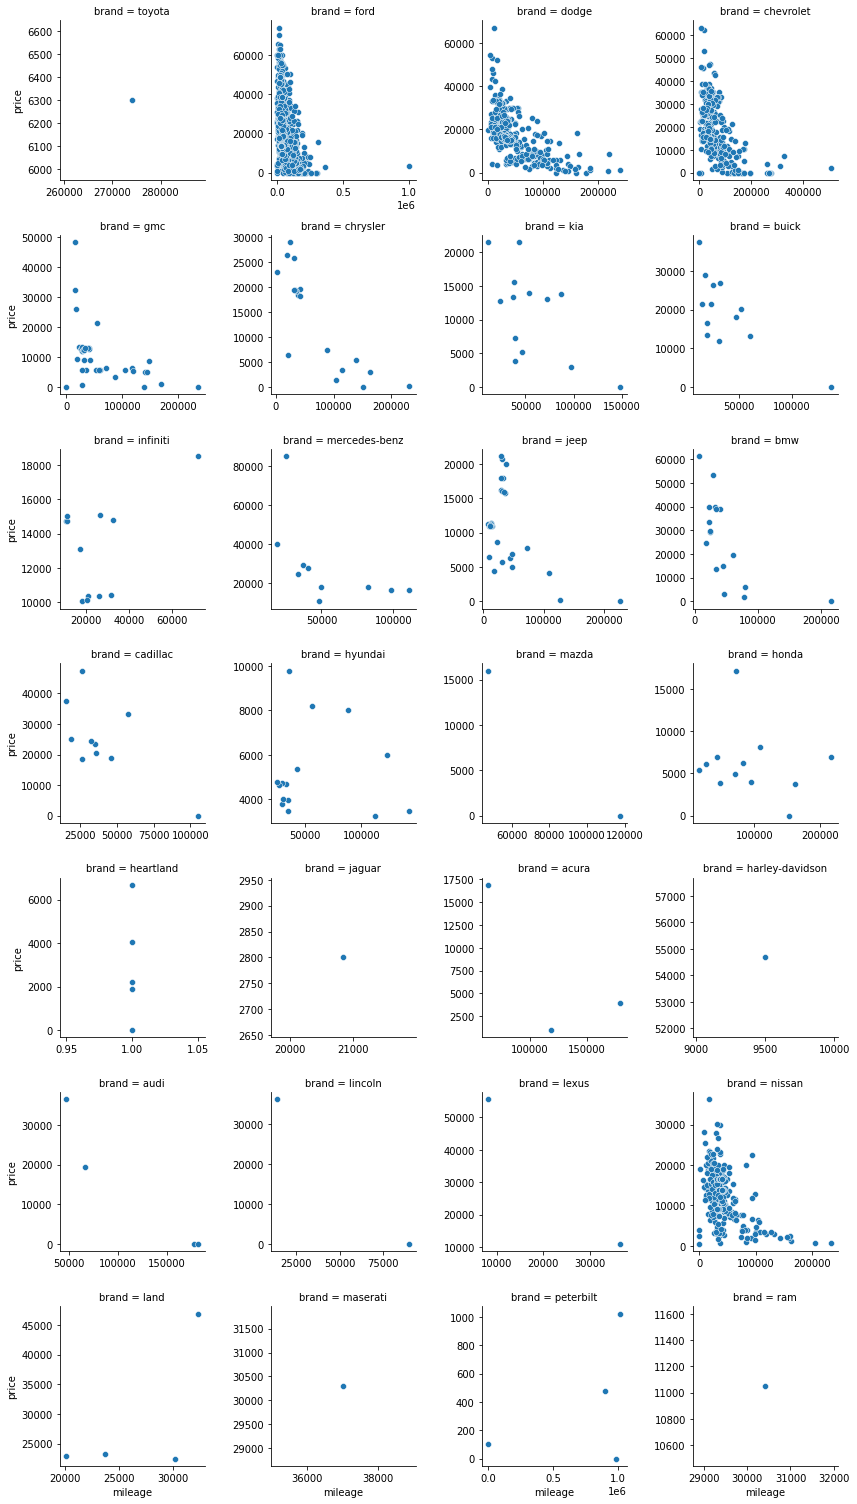

In [107]:
g = sns.FacetGrid(df, col="brand", col_wrap=4, sharex=False, sharey=False)
g.map(sns.scatterplot, 'mileage', 'price')

###### 문제-7
문제 6에서 사용한 데이터에는 이상치(`outlier`)가 포함돼 있는 것 같아서, 이를 제거하고 시각화하려고 합니다. 본 문제에서의 이상치는 다음 범위를 벗어난 값으로 정의합니다. 
> m - $\sigma$ <= x <= m + $\sigma$    
> ($\sigma$: 표준편차, m: 평균)


✅ `brand` 별로 `outlier`를 제거해 봅시다. 
- `brand` 별로 이상치를 계산해서 `brand` 별로 `outlier`를 제거해야 합니다.
- 데이터가 1개라서 표준편차를 구할 수 없는 경우 결과에서 제외합니다.

In [157]:
m = df.groupby('brand').agg({'mileage':np.mean})
s = df.groupby('brand').agg({'mileage':np.std})
lower = m-s
upper = m+s
t = pd.concat([lower, upper], axis=1) # keys=['lower','upper']
t.columns = ['lower','upper']
r = pd.merge(df, t.reset_index(), on='brand')
r.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,nco,lower,upper
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,14400,black,NaN,NaN
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,8640,silver,-2864.189609,107032.798516
2,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,1320,blue,-2864.189609,107032.798516
3,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2880,black,-2864.189609,107032.798516
4,20700,ford,door,2013,clean vehicle,100757.0,black,1ftfw1et7dfa47790,167753916,virginia,usa,1320,black,-2864.189609,107032.798516


In [163]:
result = r.loc[ (r.lower <= r.mileage) & (r.mileage <= r.upper)        ]
result.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,nco,lower,upper
2,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,1320,blue,-2864.189609,107032.798516
3,5250,ford,mpv,2017,clean vehicle,63418.0,black,2fmpk3j92hbc12542,167656121,texas,usa,2880,black,-2864.189609,107032.798516
4,20700,ford,door,2013,clean vehicle,100757.0,black,1ftfw1et7dfa47790,167753916,virginia,usa,1320,black,-2864.189609,107032.798516
5,5210,ford,mpv,2017,clean vehicle,35714.0,white,2fmpk3j95hbb73607,167656124,texas,usa,2880,white,-2864.189609,107032.798516
6,38100,ford,door,2013,clean vehicle,54380.0,gray,1ft8w3dt5deb68569,167753923,virginia,usa,1320,gray,-2864.189609,107032.798516


☝ 힌트 : 문제에서 정의한 이상치의 범위의 하한(m - $\sigma$)과 상한(m + $\sigma$)을 브랜드별로 계산해야 합니다.   
☝ 힌트 : 계산한 상한/하한 값과 원본 데이터를 합치면 값을 비교/판단하기 좋습니다.   
☝ 힌트 : 힌트는 참고 사항이며 전혀 다른 방식으로 문제를 풀어도 좋습니다. 

✅ 정리한 데이터를 차트로 시각화합니다. 

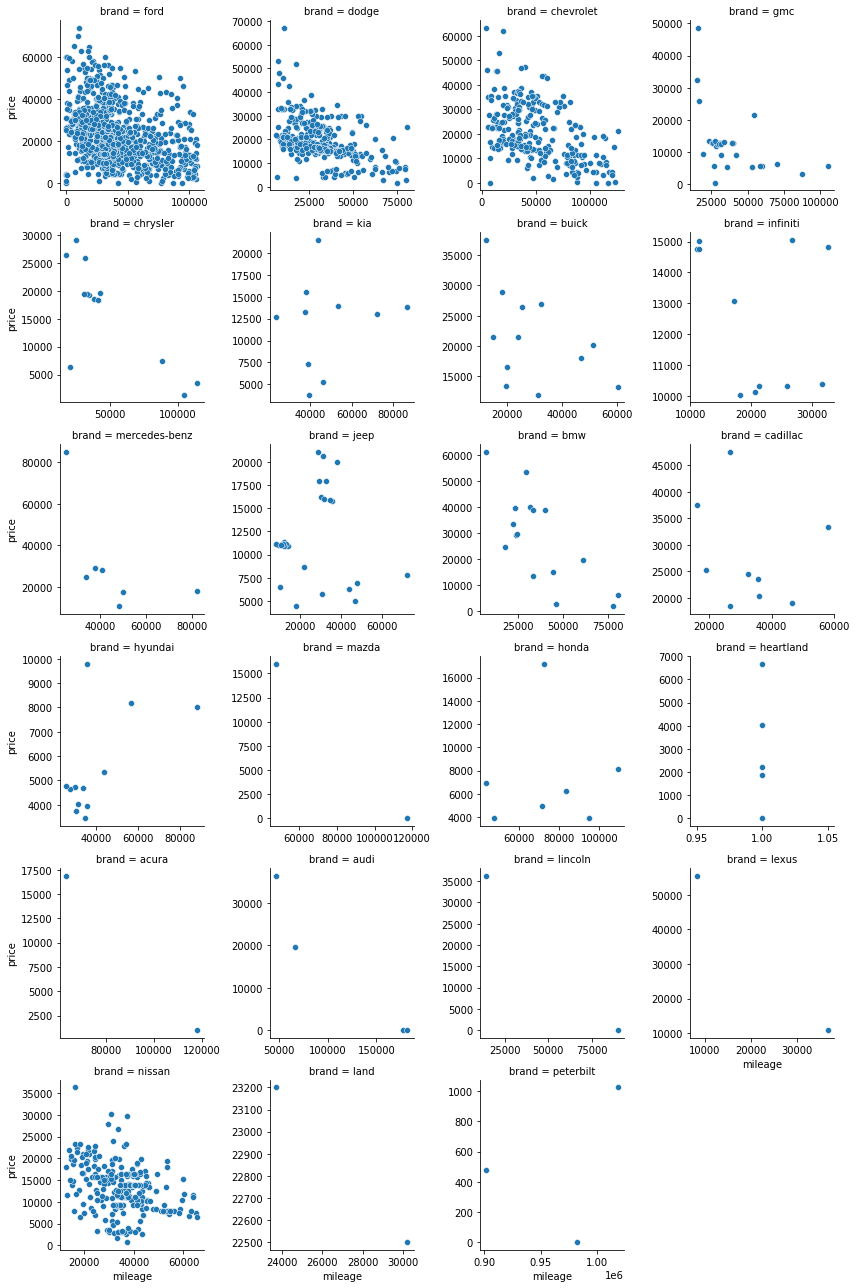

In [164]:
g = sns.FacetGrid(result, col="brand", col_wrap=4, sharex=False, sharey=False)
g.map(sns.scatterplot, 'mileage', 'price')